In [1]:
import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('bmh')

In [2]:
# Loading Data
data_train = np.load('data_train.npy')
labels_train = np.load('labels_train.npy')

labels_names =['Stadium','Building','Traffic Sign','Forest','Flowers',
              'Street','Classroom','Bridge','Statue','Lake']

print(data_train.shape, labels_train.shape)

(270000, 3124) (3124,)


In [3]:
import cv2

Class  Flowers


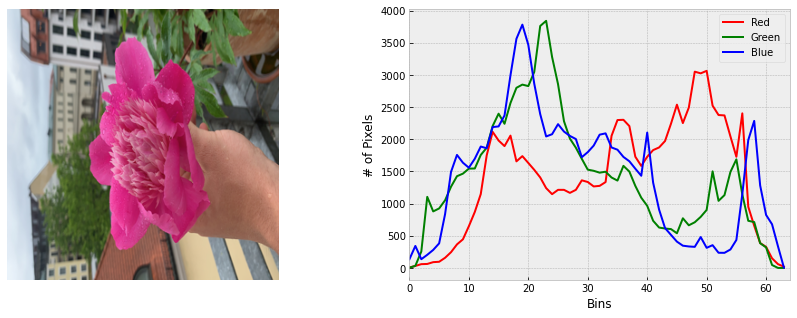

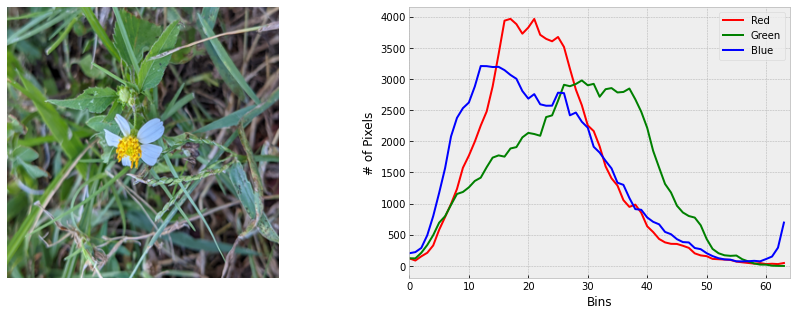

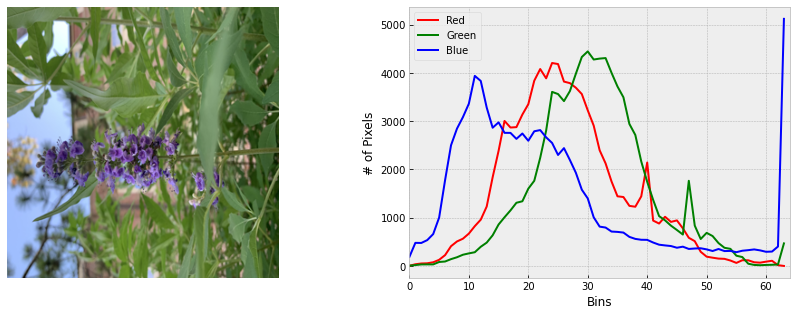

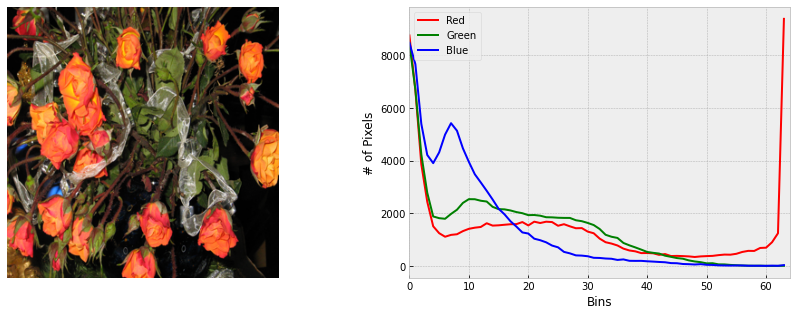

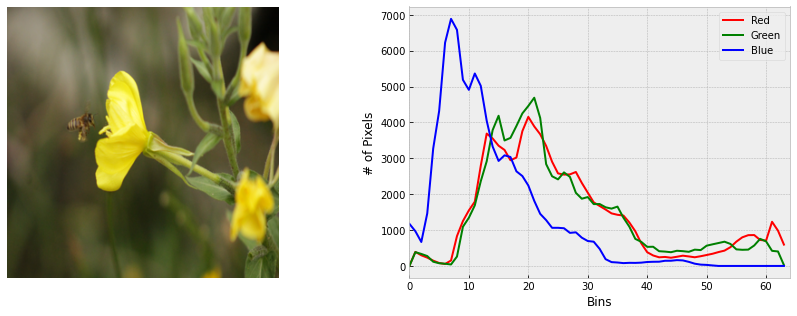

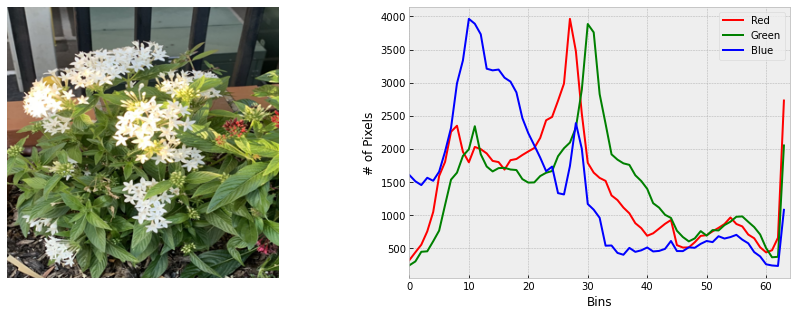

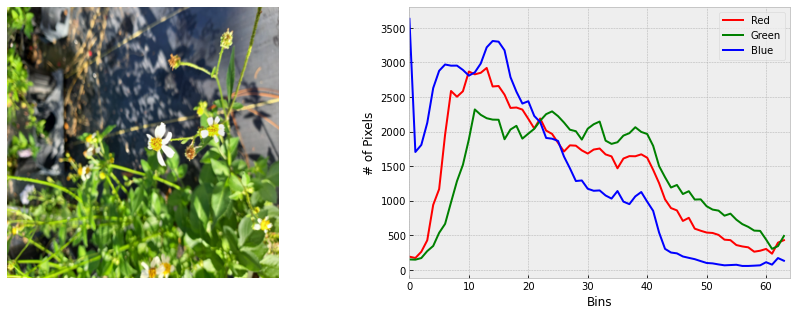

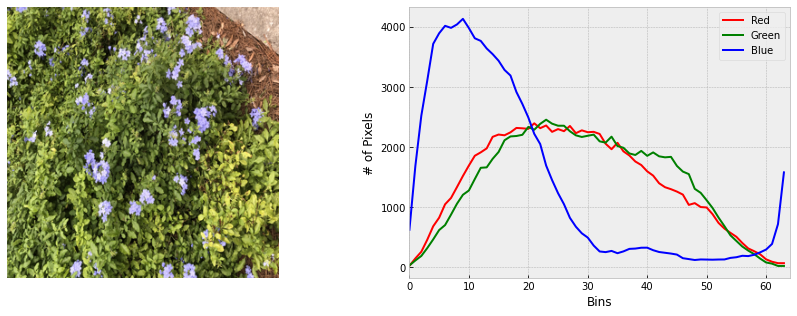

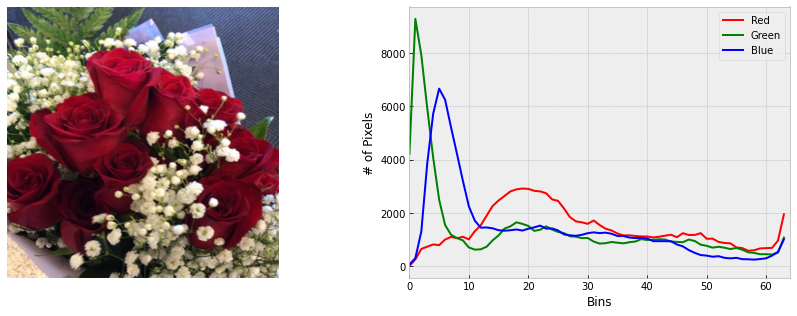

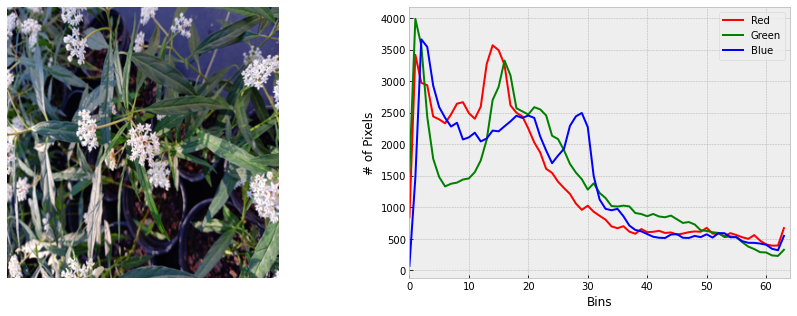

In [4]:
ll = 5 # class
bins = 64 # bins for the histogram
print('Class ',labels_names[ll-1])

# Parameters for plotting
kk=[0,3,6]
channels=['Red','Green','Blue']
cc=['r','g','b']

# Permutes the index locations for class ll
rnd_sample = npr.permutation(np.where(labels_train==ll)[0])

# Plot the histogram for the first 10 images
for i in range(10):
    image = data_train[:,rnd_sample[i]].reshape((300,300,3))
    plt.figure(figsize=(15,5))
    plt.subplot(1,2,1); plt.imshow(image); plt.axis('off')
    plt.subplot(1,2,2)
    for j in range(3):
        channel = image[:,:,j]
        hist = cv2.calcHist([channel], [0], None, [bins], [0, 256])
        plt.plot(hist,label=channels[j],c=cc[j]); plt.xlim([0, bins])
        plt.ylabel('# of Pixels')
    plt.xlabel('Bins');plt.legend();plt.show();

In [35]:
# Obtain the Histogram Features for all Samples

bins = 128
features = []
for i in range(data_train.shape[1]):
    image = data_train[:,i].reshape((300,300,3))
    f_hist=[]
    for j in range(3):
        channel = image[:,:,j]
        hist = cv2.calcHist([channel], [0], None, [bins], [0, 256])
        if j ==0:
            f_hist=hist
        else:
            f_hist=np.vstack((f_hist,hist))
    if i==0:
        features = f_hist
    else:
        features = np.hstack((features, f_hist))
features = features.T
print(features.shape)

(3124, 384)


___

In [36]:
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, classification_report

## Scaling and Partitioning Data

In [42]:
# Input Data
X = features
y = labels_train

# Applying different normalization transformations
scaler_mm = MinMaxScaler()
scaler_st = StandardScaler()
Xmm = scaler_mm.fit_transform(X)
Xst = scaler_st.fit_transform(X)

# N - no. of samples
# D - no. of features
N, D = X.shape

# Finding random locations for training set
train_idx = np.random.choice(range(N), size=int(0.8*N),replace=False)
test_idx  = np.setxor1d(range(N), train_idx)

# Training and Test Sets without normalization
X_train, y_train = X[train_idx,:], y[train_idx]
X_test, y_test = X[test_idx,:], y[test_idx]

# Training and Test Sets using Min-Max Scaling
X_train_mm, y_train_mm = Xmm[train_idx,:], y[train_idx]
X_test_mm, y_test_mm = Xmm[test_idx,:], y[test_idx]

# Training and Test Sets using Standardization
X_train_st, y_train_st = Xst[train_idx,:], y[train_idx]
X_test_st, y_test_st = Xst[test_idx,:], y[test_idx]

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(2499, 384) (625, 384) (2499,) (625,)


## Naive Bayes Classifier

In [43]:
print('Without Normalization\n')
NB = GaussianNB() # Initialize the Naive Bayes Object
NB.fit(X_train, y_train) # FInd the likelihood and priors using the training set
y_predict_NB = NB.predict(X_test) # predict labels for test set

# Performance measures
print('Accuracy: ', 100*accuracy_score(y_test, y_predict_NB),'%\n')
print('Confusion Matrix:\n',confusion_matrix(y_test, y_predict_NB),'\n')
print(classification_report(y_test, y_predict_NB))

Without Normalization

Accuracy:  30.56 %

Confusion Matrix:
 [[ 6  7  2 11  5  3  7  7  2 12]
 [ 3  4  7  8  1 12  1  8  2  7]
 [ 3  2 11 18  7  5  0  2  1  4]
 [ 0  0  1 57  8  5  1  0  0  2]
 [ 1  1  4 14 29  2  9  1  3  2]
 [ 3  1  1  7  3 22  2  3  3  7]
 [ 1  3  1  5  6 11 43  3  3  1]
 [ 1  6  5 18  7  6  5  6  1 11]
 [ 1  3  7 15 16  9  9  5  0  4]
 [ 1  5  2 14  5  3  6  2  2 13]] 

              precision    recall  f1-score   support

         1.0       0.30      0.10      0.15        62
         2.0       0.12      0.08      0.09        53
         3.0       0.27      0.21      0.23        53
         4.0       0.34      0.77      0.47        74
         5.0       0.33      0.44      0.38        66
         6.0       0.28      0.42      0.34        52
         7.0       0.52      0.56      0.54        77
         8.0       0.16      0.09      0.12        66
         9.0       0.00      0.00      0.00        69
        10.0       0.21      0.25      0.22        53

    accur

In [44]:
print('Using Min-Max Scaling\n')
NB = GaussianNB() # Initialize the Naive Bayes Object
NB.fit(X_train_mm, y_train_mm) # FInd the likelihood and priors using the training set
y_predict_NB = NB.predict(X_test_mm) # predict labels for test set

# Performance measures
print('Accuracy: ', 100*accuracy_score(y_test_mm, y_predict_NB),'%\n')
print('Confusion Matrix:\n',confusion_matrix(y_test_mm, y_predict_NB),'\n')
print(classification_report(y_test_mm, y_predict_NB))

Using Min-Max Scaling

Accuracy:  30.56 %

Confusion Matrix:
 [[ 6  7  2 11  5  3  7  7  2 12]
 [ 3  4  7  8  1 12  1  8  2  7]
 [ 3  2 11 18  7  5  0  2  1  4]
 [ 0  0  1 57  8  5  1  0  0  2]
 [ 1  1  4 14 29  2  9  1  3  2]
 [ 3  1  1  7  3 22  2  3  3  7]
 [ 1  3  1  5  6 11 43  3  3  1]
 [ 1  6  5 18  7  6  5  6  1 11]
 [ 1  3  7 15 16  9  9  5  0  4]
 [ 1  5  2 14  5  3  6  2  2 13]] 

              precision    recall  f1-score   support

         1.0       0.30      0.10      0.15        62
         2.0       0.12      0.08      0.09        53
         3.0       0.27      0.21      0.23        53
         4.0       0.34      0.77      0.47        74
         5.0       0.33      0.44      0.38        66
         6.0       0.28      0.42      0.34        52
         7.0       0.52      0.56      0.54        77
         8.0       0.16      0.09      0.12        66
         9.0       0.00      0.00      0.00        69
        10.0       0.21      0.25      0.22        53

    accur

In [45]:
print('Using Standardization\n')
NB = GaussianNB() # Initialize the Naive Bayes Object
NB.fit(X_train_st, y_train_st) # FInd the likelihood and priors using the training set
y_predict_NB = NB.predict(X_test_st) # predict labels for test set

# Performance measures
print('Accuracy: ', 100*accuracy_score(y_test_st, y_predict_NB),'%\n')
print('Confusion Matrix:\n',confusion_matrix(y_test_st, y_predict_NB),'\n')
print(classification_report(y_test_st, y_predict_NB))

Using Standardization

Accuracy:  30.56 %

Confusion Matrix:
 [[ 6  7  2 11  5  3  7  7  2 12]
 [ 3  4  7  8  1 12  1  8  2  7]
 [ 3  2 11 18  7  5  0  2  1  4]
 [ 0  0  1 57  8  5  1  0  0  2]
 [ 1  1  4 14 29  2  9  1  3  2]
 [ 3  1  1  7  3 22  2  3  3  7]
 [ 1  3  1  5  6 11 43  3  3  1]
 [ 1  6  5 18  7  6  5  6  1 11]
 [ 1  3  7 15 16  9  9  5  0  4]
 [ 1  5  2 14  5  3  6  2  2 13]] 

              precision    recall  f1-score   support

         1.0       0.30      0.10      0.15        62
         2.0       0.12      0.08      0.09        53
         3.0       0.27      0.21      0.23        53
         4.0       0.34      0.77      0.47        74
         5.0       0.33      0.44      0.38        66
         6.0       0.28      0.42      0.34        52
         7.0       0.52      0.56      0.54        77
         8.0       0.16      0.09      0.12        66
         9.0       0.00      0.00      0.00        69
        10.0       0.21      0.25      0.22        53

    accur